In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping,ModelCheckpoint,LearningRateScheduler
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

In [18]:
df = pd.read_csv('/kaggle/input/datasetoftafahas2/audio_features(9).csv')
df.head()

,File Path,File Name (WAV),Mean MFCC Coefficients,Spectral Centroid,Sample Rate,Duration (seconds),Class Label
0,/kaggle/working/output_dataset/Generated Voice...,2.6.9.0.0.wav,"[-463.0484619140625, 107.15552520751953, 25.76...",1253.355869,441000,18,Generated Voices by ai voices
1,/kaggle/working/output_dataset/Generated Voice...,2.6.7.0.0.wav,"[-443.50152587890625, 97.10150909423828, 31.84...",922.834842,441000,18,Generated Voices by ai voices
2,/kaggle/working/output_dataset/Generated Voice...,2.5.8.0.0.wav,"[-454.6553649902344, 79.39002227783203, 26.142...",961.790486,441000,18,Generated Voices by ai voices
3,/kaggle/working/output_dataset/Generated Voice...,2.4.6.0.0.wav,"[-473.5799865722656, 81.26899719238281, 27.133...",1005.355416,441000,18,Generated Voices by ai voices
4,/kaggle/working/output_dataset/Generated Voice...,2.6.0.0.0.wav,"[-483.6876220703125, 95.53182983398438, 29.728...",1001.768648,441000,18,Generated Voices by ai voices


# Data exploring

In [19]:
df.shape

(138, 7)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   File Path               138 non-null    object 
 1   File Name (WAV)         138 non-null    object 
 2   Mean MFCC Coefficients  138 non-null    object 
 3   Spectral Centroid       138 non-null    float64
 4   Sample Rate             138 non-null    int64  
 5   Duration (seconds)      138 non-null    int64  
 6   Class Label             138 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 7.7+ KB


In [21]:
df['Class Label'].value_counts()

Class Label
Real Voices                      47
Cloned Voices                    46
Generated Voices by ai voices    45
Name: count, dtype: int64

#  MFCC separating 

In [22]:
# Convert the "Mean MFCC Coefficients" column from string to list of floats
df['Mean MFCC Coefficients'] = df['Mean MFCC Coefficients'].apply(eval)

In [23]:
df['Mean MFCC Coefficients']

0      [-463.0484619140625, 107.15552520751953, 25.76...
1      [-443.50152587890625, 97.10150909423828, 31.84...
2      [-454.6553649902344, 79.39002227783203, 26.142...
3      [-473.5799865722656, 81.26899719238281, 27.133...
4      [-483.6876220703125, 95.53182983398438, 29.728...
                             ...                        
133    [-427.9771728515625, 97.63719177246094, 28.873...
134    [-436.3186950683594, 85.73974609375, 28.996187...
135    [-428.73193359375, 92.20032501220703, 28.93862...
136    [-429.6935729980469, 89.70471954345703, 28.540...
137    [-387.77105712890625, 119.86361694335938, 29.6...
Name: Mean MFCC Coefficients, Length: 138, dtype: object

In [24]:
# Flatten the lists in the "Mean MFCC Coefficients" column and create new columns
df = df.join(pd.DataFrame(df['Mean MFCC Coefficients'].tolist(), columns=[f'MFCC_{i}' for i in range(20)]))

In [25]:
# Drop the original "Mean MFCC Coefficients" column
df.drop('Mean MFCC Coefficients', axis=1, inplace=True)

In [26]:
df.head() 

,File Path,File Name (WAV),Spectral Centroid,Sample Rate,Duration (seconds),Class Label,MFCC_0,MFCC_1,MFCC_2,MFCC_3,...,MFCC_10,MFCC_11,MFCC_12,MFCC_13,MFCC_14,MFCC_15,MFCC_16,MFCC_17,MFCC_18,MFCC_19
0,/kaggle/working/output_dataset/Generated Voice...,2.6.9.0.0.wav,1253.355869,441000,18,Generated Voices by ai voices,-463.048462,107.155525,25.766592,-37.599911,...,-15.572581,1.249795,8.345414,-1.579929,-15.623175,-17.928823,-7.391050,3.427956,3.969828,-3.543819
1,/kaggle/working/output_dataset/Generated Voice...,2.6.7.0.0.wav,922.834842,441000,18,Generated Voices by ai voices,-443.501526,97.101509,31.845524,-21.510380,...,-11.941571,0.350331,5.396183,-2.528261,-13.673671,-15.571008,-7.055789,1.881229,2.339669,-4.195484
2,/kaggle/working/output_dataset/Generated Voice...,2.5.8.0.0.wav,961.790486,441000,18,Generated Voices by ai voices,-454.655365,79.390022,26.142775,-16.344536,...,-11.513140,-0.620874,4.733402,-1.137631,-10.575718,-13.018121,-6.886503,0.098712,0.699097,-4.218849
3,/kaggle/working/output_dataset/Generated Voice...,2.4.6.0.0.wav,1005.355416,441000,18,Generated Voices by ai voices,-473.579987,81.268997,27.133022,-16.327650,...,-10.502681,0.522660,5.078091,-1.536211,-10.858258,-12.544206,-5.975734,0.531934,0.210381,-5.035092
4,/kaggle/working/output_dataset/Generated Voice...,2.6.0.0.0.wav,1001.768648,441000,18,Generated Voices by ai voices,-483.687622,95.531830,29.728680,-23.030621,...,-13.762914,-0.556363,5.837559,-1.005819,-11.779822,-14.237789,-7.066321,0.448753,0.369540,-5.390703


# Data preprocessing

In [27]:
#converting the class label values into integers
label_encoder = preprocessing.LabelEncoder()
df['Class Label'] = label_encoder.fit_transform(df['Class Label'])

In [28]:
df['Class Label'] 

0      1
1      1
2      1
3      1
4      1
      ..
133    0
134    0
135    0
136    0
137    0
Name: Class Label, Length: 138, dtype: int64

> ****Let's convert the label values into integers****

In [29]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Class Label'] = label_encoder.fit_transform(df['Class Label'])

> ****let's drop the unnesessary features****

In [30]:
X = df.drop(['File Name (WAV)','File Path','Class Label'],axis=1)
y = df['Class Label'] 

In [31]:
X

,Spectral Centroid,Sample Rate,Duration (seconds),MFCC_0,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,...,MFCC_10,MFCC_11,MFCC_12,MFCC_13,MFCC_14,MFCC_15,MFCC_16,MFCC_17,MFCC_18,MFCC_19
0,1253.355869,441000,18,-463.048462,107.155525,25.766592,-37.599911,-44.050316,-7.894618,25.028833,...,-15.572581,1.249795,8.345414,-1.579929,-15.623175,-17.928823,-7.391050,3.427956,3.969828,-3.543819
1,922.834842,441000,18,-443.501526,97.101509,31.845524,-21.510380,-31.925879,-8.258445,15.786948,...,-11.941571,0.350331,5.396183,-2.528261,-13.673671,-15.571008,-7.055789,1.881229,2.339669,-4.195484
2,961.790486,441000,18,-454.655365,79.390022,26.142775,-16.344536,-22.694374,-1.335382,18.684362,...,-11.513140,-0.620874,4.733402,-1.137631,-10.575718,-13.018121,-6.886503,0.098712,0.699097,-4.218849
3,1005.355416,441000,18,-473.579987,81.268997,27.133022,-16.327650,-23.541739,-3.003403,16.318396,...,-10.502681,0.522660,5.078091,-1.536211,-10.858258,-12.544206,-5.975734,0.531934,0.210381,-5.035092
4,1001.768648,441000,18,-483.687622,95.531830,29.728680,-23.030621,-31.404675,-5.470304,19.396692,...,-13.762914,-0.556363,5.837559,-1.005819,-11.779822,-14.237789,-7.066321,0.448753,0.369540,-5.390703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,1164.568541,441000,18,-427.977173,97.637192,28.873367,-26.771008,-36.397198,-9.729955,16.964502,...,-14.793645,-1.562218,5.344254,-0.996338,-11.703249,-14.392458,-7.148794,1.154374,2.224770,-2.979625
134,1005.711537,441000,18,-436.318695,85.739746,28.996187,-16.999424,-25.290184,-4.167768,16.325390,...,-12.495592,-0.546953,5.114698,-1.481758,-11.935906,-14.572200,-7.434046,0.989329,2.276951,-3.156676
135,1016.433316,441000,18,-428.731934,92.200325,28.938625,-21.546873,-29.379238,-4.775470,18.144011,...,-11.860270,1.047673,5.691662,-3.032484,-14.429029,-15.811154,-6.602441,2.609900,2.924302,-3.812216
136,956.956574,441000,18,-429.693573,89.704720,28.540453,-20.388245,-28.052774,-4.089177,18.479383,...,-12.736932,-0.251549,5.150354,-2.244093,-12.938615,-14.800152,-6.646113,1.983849,2.579014,-3.567379


In [32]:
y

0      1
1      1
2      1
3      1
4      1
      ..
133    0
134    0
135    0
136    0
137    0
Name: Class Label, Length: 138, dtype: int64

In [34]:
#feature scaling 
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data. 
X = pd.DataFrame(np_scaled, columns = cols)

> ****The random seed will affect the random initialization of the model's weights, biases, or any other trainable parameters that are part of the model architecture. The random seed determines the starting point for the random number generation during the initialization process and it can help ensure consistent weight initialization across different runs.****

In [35]:
# Set the random seed
import random
import tensorflow as tf
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

># Train-Test Split

In [36]:
# For training, split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [37]:
X_train.shape[1]

23

In [38]:
model = Sequential()

model.add(Flatten(input_shape=(23,)))
model.add(Dense(512, activation='relu', kernel_regularizer = keras.regularizers.l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu', kernel_regularizer = keras.regularizers.l2(0.003)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer = keras.regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 23)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        12,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 162,474 (634.66 KB)

 Trainable params: 162,474 (634.66 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
early_stopping= EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5) 
check_pointer = ModelCheckpoint(filepath = 'clf-resnet-checkpoint.keras',verbose=1,save_best_only=True) 
reduce_lr = ReduceLROnPlateau(monitor='val_loss',mode='min',verbose=1,patience=5,min_delta = 0.0001,factor=0.2) 
callbacks = [check_pointer,early_stopping,reduce_lr]

In [40]:
from tensorflow.keras.optimizers import RMSprop

# Compile the model
optimizer = RMSprop(learning_rate=1e-3)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [41]:
hist = model.fit(X_train, y_train,
                 validation_data = (X_test,y_test),
                 epochs = 100,
                 batch_size = 16, callbacks = [check_pointer,early_stopping])

Epoch 1/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.1875 - loss: 4.3520
Epoch 1: val_loss improved from inf to 3.21534, saving model to clf-resnet-checkpoint.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.2753 - loss: 4.0301 - val_accuracy: 0.2619 - val_loss: 3.2153
Epoch 2/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2500 - loss: 3.2014
Epoch 2: val_loss improved from 3.21534 to 2.79819, saving model to clf-resnet-checkpoint.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3088 - loss: 3.1170 - val_accuracy: 0.2619 - val_loss: 2.7982
Epoch 3/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1875 - loss: 3.0364
Epoch 3: val_loss improved from 2.79819 to 2.64365, saving model to clf-resnet-checkpoint.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3246 - loss: 2.9071 - val_accuracy: 0.2619 - val_loss: 2.6436
Epoch 4/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2500 - loss: 2.6505
Epoch 4: val_loss improved from 2.64365 

Final Training Accuracy: 0.88
Final Testing Accuracy: 0.76


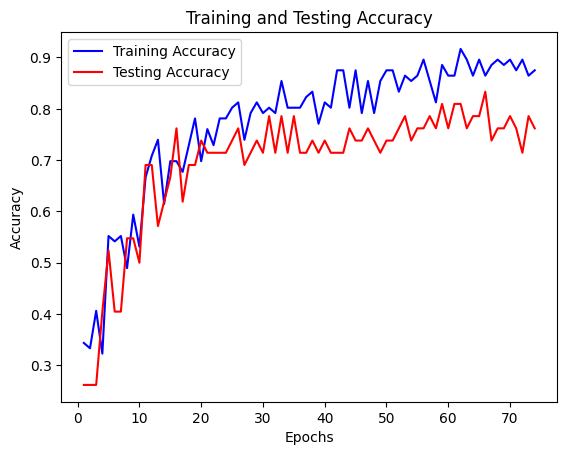

In [42]:
train_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

#Print the final accuracy
final_train_accuracy = "{:.2f}".format(train_accuracy[-1])
final_val_accuracy = "{:.2f}".format(val_accuracy[-1])
print(f"Final Training Accuracy: {final_train_accuracy}")
print(f"Final Testing Accuracy: {final_val_accuracy}")

# Plotting the accuracy values
epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Training Loss:  0.53
Testing Loss:  0.70


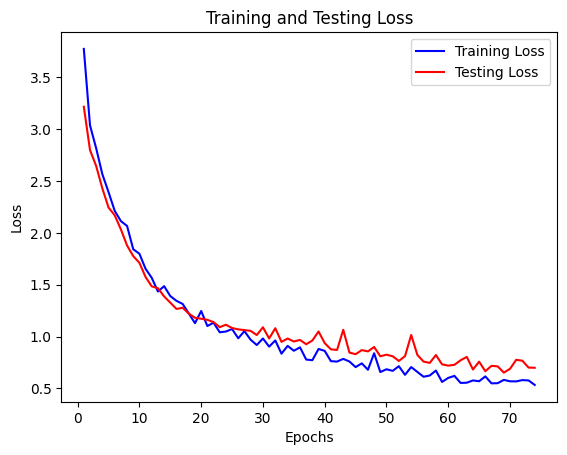

In [43]:
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Print training and validation loss
final_train_loss = "{:.2f}".format(train_loss[-1])
final_val_loss = "{:.2f}".format(val_loss[-1])
print("Training Loss: ", final_train_loss)
print("Testing Loss: ", final_val_loss)

# Plotting the loss values
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Testing Loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Classification Report:
               precision    recall  f1-score   support

Cloned Voices       0.73      0.79      0.76        14
    ai Voices       0.71      0.71      0.71        17
  Real Voices       0.90      0.82      0.86        11

     accuracy                           0.76        42
    macro avg       0.78      0.77      0.77        42
 weighted avg       0.77      0.76      0.76        42



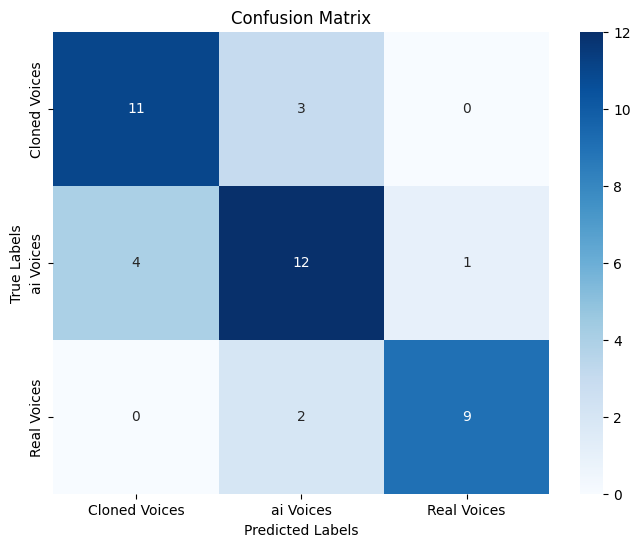

In [44]:
# Generate predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Generate classification report
class_names = ['Cloned Voices', 'ai Voices', 'Real Voices']
classification_rep = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:")
print(classification_rep)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [45]:
class_names = ['Cloned voice class', 'Generated by AI class', 'Real voices class']
# Get the number of classes
num_classes = cm.shape[0]

# Print the accuracy for each class
for i in range(num_classes):
    class_accuracy = cm[i, i] / np.sum(cm[i, :])
    class_name = class_names[i]
    print("Accuracy for", class_name, ":", "{:.2f}".format(class_accuracy))

Accuracy for Cloned voice class : 0.79
Accuracy for Generated by AI class : 0.71
Accuracy for Real voices class : 0.82


In [16]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")